# Test de l'algorithme du recuit simulé

## Mono-objectif à 2 variables

In [1]:
import numpy as np
import math
import random
from simulated_annealing import *
eval_calls = 0
# Fonction à optimiser (exemple ici : fonction de Rosenbrock)
def fonction_objectif(x, y):
    global eval_calls
    eval_calls+=1
    return (1 - x)**2 + 100 * (y - x**2)**2


In [5]:
eval_calls=0
# Paramètres de l'algorithme
T_init = 100.0
T_min = 1e-5
alpha = 0.99
max_iterations = 100000

# Domaine de recherche
xmin, xmax = -5, 5
ymin, ymax = -5, 5

best_solution, best_value = recuit_simule(fonction_objectif, xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)

print("Meilleure solution trouvée:", best_solution)
print("Valeur de la fonction objectif:", best_value)
print('Nb d\'évaluations:' ,eval_calls)


Meilleure solution trouvée: (0.9996288031569059, 1.0023930706042006)
Valeur de la fonction objectif: 0.0009831650153210986
Nb d'évaluations: 3768


## Multi-objectif

In [10]:
import numpy as np
import math
import random

eval_calls = 0

# Fonctions objectif
def objective_function1(x, y):
    global eval_calls
    eval_calls += 1
    return (x-1)**2 +  (y - 2)**2

def objective_function2(x, y):
    global eval_calls
    eval_calls += 1
    return (x + 1)**2 + (y - 1)**2

front = []
# Paramètres de l'algorithme
xmin, xmax = -5, 5
ymin, ymax = -5, 5
T_init = 1.0
T_min = 0.01
alpha = 0.99
max_iterations = 300

for i in range(100):
    best_solution, best_value = multi_objective_simulated_annealing([objective_function1, objective_function2], xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)
    front.append(best_value)

#best_solution, best_value = multi_objective_simulated_annealing([objective_function1, objective_function2], xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)
# Exécution de l'algorithme multi-objectif de recuit simulé

# Affichage du résultat
print("Meilleure solution trouvée:", best_solution)
print("Valeurs des fonctions objectif:", best_value)
print("Nombre d'appels à la fonction objectif:", eval_calls)


Meilleure solution trouvée: (1.1547266899692559, 0.9017818722878826)
Valeurs des fonctions objectif: [1.230023404624351, 4.65249390907714]
Nombre d'appels à la fonction objectif: 153800


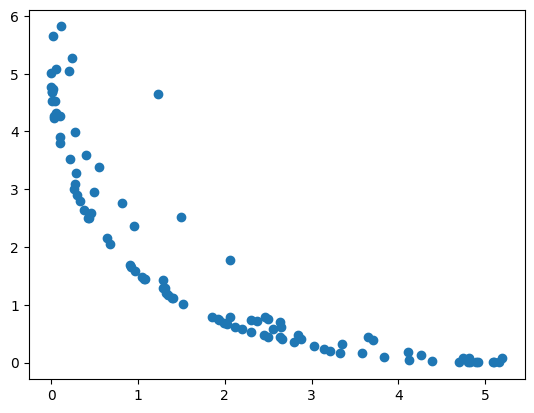

In [11]:
import matplotlib.pyplot as plt
F1 = [front[i][0] for i in range(len(front))]
F2 = [front[i][1] for i in range(len(front))]

plt.scatter(F1,F2)

### BNH

In [12]:
import numpy as np
import math
import random

eval_calls = 0

# Fonctions objectif
def objective_function1(x, y):
    global eval_calls
    eval_calls += 1
    return 4*x**2 + 4*y**2

def objective_function2(x, y):
    global eval_calls
    eval_calls += 1
    return (x-5)**2 + (y-5)**2 

def c1(x,y):
    return ((x-5)**2 + (y-5)**2 -25)

def c2(x,y):
    return((x-8)**2 + (y+3)**2 -7.7 )

front = []
# Paramètres de l'algorithme
xmin, xmax = 0, 5
ymin, ymax = 0, 3
T_init = 10.0
T_min = 0.01
alpha = 0.99
max_iterations = 300

for i in range(100):
    best_solution, best_value = multi_objective_simulated_annealing([objective_function1, objective_function2], xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)
    front.append(best_value)
#best_solution, best_value = multi_objective_simulated_annealing([objective_function1, objective_function2], xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)

# Exécution de l'algorithme multi-objectif de recuit simulé

# Affichage du résultat
print("Meilleure solution trouvée:", best_solution)
print("Valeurs des fonctions objectif:", best_value)
print("Nombre d'appels à la fonction objectif:", eval_calls)

Meilleure solution trouvée: (4.057792492678566, 2.277628212964473)
Valeurs des fonctions objectif: [86.61308076052107, 8.29906313369988]
Nombre d'appels à la fonction objectif: 163044


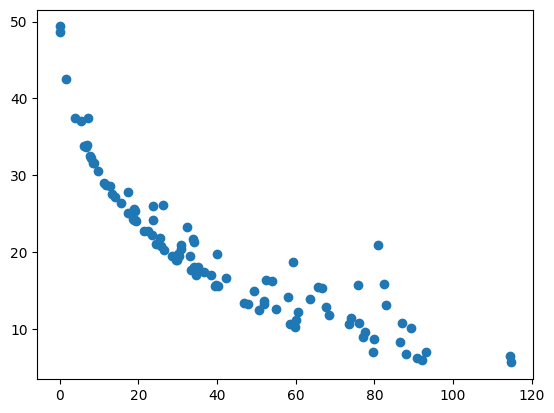

In [14]:
import matplotlib.pyplot as plt
F1 = [front[i][0] for i in range(len(front))]
F2 = [front[i][1] for i in range(len(front))]

plt.scatter(F1,F2)

### TNK

In [204]:
import numpy as np
import math
import random

eval_calls = 0

# Fonctions objectif
def objective_function1(x, y):
    global eval_calls
    eval_calls += 1
    return x

def objective_function2(x, y):
    global eval_calls
    eval_calls += 1
    return y

def c1(x,y):
    return ((x-5)**2 + (y-5)**2 -25)

def c2(x,y):
    return((x-8)**2 + (y+3)**2 -7.7 )

# Algorithme de recuit simulé multi-objectif
def multi_objective_simulated_annealing(objective_functions, xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations):
    # Initialisation de la solution initiale
    x_current = random.uniform(xmin, xmax)
    y_current = random.uniform(ymin, ymax)
    best_solution = (x_current, y_current)
    best_value = [f(x_current, y_current) for f in objective_functions]

    T = T_init

    for i in range(max_iterations):
        # Sélection d'une nouvelle solution voisine
        x_new = x_current + random.uniform(-0.1, 0.1)
        y_new = y_current + random.uniform(-0.1, 0.1)
        
        # Vérifier les limites
        x_new = min(max(xmin, x_new), xmax)
        y_new = min(max(ymin, y_new), ymax)

        # Calcul de la variation des fonctions objectif
        delta = [f(x_new, y_new) - f(x_current, y_current) for f in objective_functions]

        # Accepter la nouvelle solution avec une certaine probabilité
        accept = all(d <= 0 or random.random() < math.exp(-d / T) for d in delta)
        if accept :
            x_current, y_current = x_new, y_new

            # Mettre à jour la meilleure solution si nécessaire
            current_values = [f(x_current, y_current) for f in objective_functions]
            if all(cv <= bv for cv, bv in zip(current_values, best_value)):
                best_solution = (x_current, y_current)
                best_value = current_values

        # Refroidissement de la température
        T *= alpha
        if T < T_min:
            break

    return best_solution, best_value


front = []
# Paramètres de l'algorithme
xmin, xmax = 0, np.pi
ymin, ymax = 0, np.pi
T_init = 10.0
T_min = 0.01
alpha = 0.99
max_iterations = 1000

for i in range(100):
    best_solution, best_value = multi_objective_simulated_annealing([objective_function1, objective_function2], xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)
    front.append(best_value)


# Exécution de l'algorithme multi-objectif de recuit simulé

# Affichage du résultat
print("Meilleure solution trouvée:", best_solution)
print("Valeurs des fonctions objectif:", best_value)
print("Nombre d'appels à la fonction objectif:", eval_calls)

Meilleure solution trouvée: (0, 0)
Valeurs des fonctions objectif: [0, 0]
Nombre d'appels à la fonction objectif: 379624


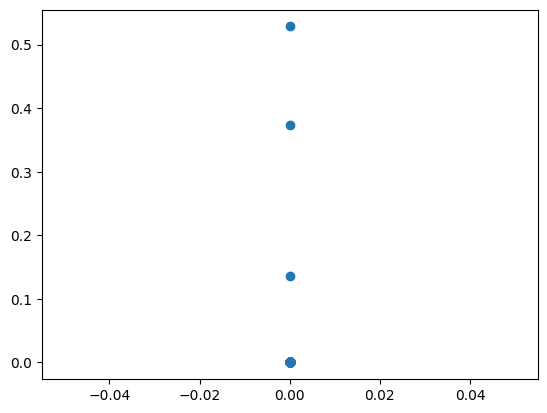

In [205]:
import matplotlib.pyplot as plt
F1 = [front[i][0] for i in range(len(front))]
F2 = [front[i][1] for i in range(len(front))]

plt.scatter(F1,F2)

### ZDT1

In [207]:
import numpy as np
import math
import random

eval_calls = 0

# Fonctions objectif
def objective_function1(x, y):
    global eval_calls
    eval_calls += 1
    return x

def objective_function2(x, y):
    global eval_calls
    eval_calls += 1
    g = 1 + 9*(x+y)
    h = 1-np.sqrt(x/g)
    return g*h


# Algorithme de recuit simulé multi-objectif
def multi_objective_simulated_annealing(objective_functions, xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations):
    # Initialisation de la solution initiale
    x_current = random.uniform(xmin, xmax)
    y_current = random.uniform(ymin, ymax)
    best_solution = (x_current, y_current)
    best_value = [f(x_current, y_current) for f in objective_functions]

    T = T_init

    for i in range(max_iterations):
        # Sélection d'une nouvelle solution voisine
        x_new = x_current + random.uniform(-0.1, 0.1)
        y_new = y_current + random.uniform(-0.1, 0.1)
        
        # Vérifier les limites
        x_new = min(max(xmin, x_new), xmax)
        y_new = min(max(ymin, y_new), ymax)

        # Calcul de la variation des fonctions objectif
        delta = [f(x_new, y_new) - f(x_current, y_current) for f in objective_functions]

        # Accepter la nouvelle solution avec une certaine probabilité
        accept = all(d <= 0 or random.random() < math.exp(-d / T) for d in delta)
        if accept :
            x_current, y_current = x_new, y_new

            # Mettre à jour la meilleure solution si nécessaire
            current_values = [f(x_current, y_current) for f in objective_functions]
            if all(cv <= bv for cv, bv in zip(current_values, best_value)):
                best_solution = (x_current, y_current)
                best_value = current_values

        # Refroidissement de la température
        T *= alpha
        if T < T_min:
            break

    return best_solution, best_value


front = []
# Paramètres de l'algorithme
xmin, xmax = 0, 1
ymin, ymax = 0, 1
T_init = 10.0
T_min = 0.01
alpha = 0.99
max_iterations = 1000

for i in range(100):
    best_solution, best_value = multi_objective_simulated_annealing([objective_function1, objective_function2], xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)
    front.append(best_value)


# Exécution de l'algorithme multi-objectif de recuit simulé

# Affichage du résultat
print("Meilleure solution trouvée:", best_solution)
print("Valeurs des fonctions objectif:", best_value)
print("Nombre d'appels à la fonction objectif:", eval_calls)

Meilleure solution trouvée: (0, 0)
Valeurs des fonctions objectif: [0, 1.0]
Nombre d'appels à la fonction objectif: 354622


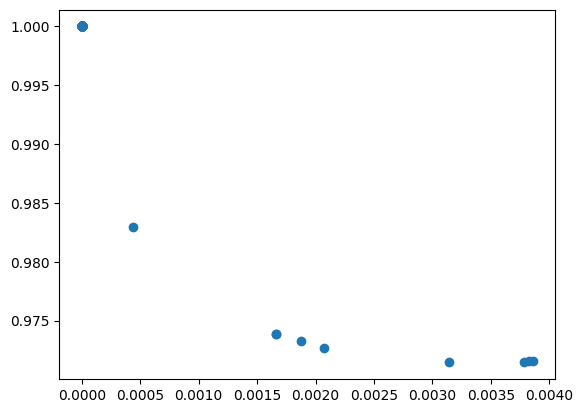

In [208]:
import matplotlib.pyplot as plt
F1 = [front[i][0] for i in range(len(front))]
F2 = [front[i][1] for i in range(len(front))]

plt.scatter(F1,F2)

### Srinivas

In [19]:
import numpy as np
import math
import random

eval_calls = 0

# Fonctions objectif
def objective_function1(x, y):
    global eval_calls
    eval_calls += 1
    return (x-2)**2 + (y-1)**2 +2

def objective_function2(x, y):
    global eval_calls
    eval_calls += 1
    return 9*x - (y-1)**2 

def c1(x,y):
    return x**2+y**2-225

def c2(x,y):
    return x-3*y +10

front = []
# Paramètres de l'algorithme
xmin, xmax = -20, 20
ymin, ymax = -20, 20
T_init = 100.0
T_min = 0.00001
alpha = 0.99
max_iterations = 10000

for i in range(100):
    best_solution, best_value = multi_objective_simulated_annealing([objective_function1, objective_function2], xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)
    front.append(best_value)


# Exécution de l'algorithme multi-objectif de recuit simulé

# Affichage du résultat
print("Meilleure solution trouvée:", best_solution)
print("Valeurs des fonctions objectif:", best_value)
print("Nombre d'appels à la fonction objectif:", eval_calls)

Meilleure solution trouvée: (-4.802783235690661, 11.643994384271267)
Valeurs des fonctions objectif: [161.57247620419216, -156.5196655736142]
Nombre d'appels à la fonction objectif: 736088


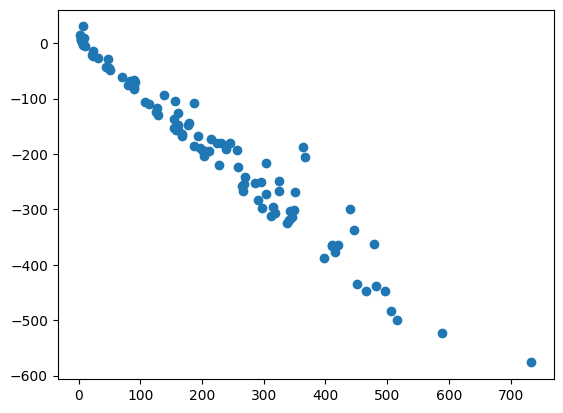

In [20]:
import matplotlib.pyplot as plt
F1 = [front[i][0] for i in range(len(front))]
F2 = [front[i][1] for i in range(len(front))]

plt.scatter(F1,F2)

## Ackley

In [18]:
eval_calls = 0
# Fonction à optimiser (exemple ici : fonction de Ackley)
def fonction_ackley(x, y):
    global eval_calls
    eval_calls+=1
    return (-20*np.exp(-0.2*np.sqrt(1/2*(x**2 + y**2))) - np.exp(1/2*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))) + np.exp(1) +20)

# Paramètres de l'algorithme
T_init = 100.0
T_min = 1e-7
alpha = 0.99
max_iterations = 100000

# Domaine de recherche
xmin, xmax = -5, 5
ymin, ymax = -5, 5

best_solution, best_value = recuit_simule(fonction_ackley, xmin, xmax, ymin, ymax, T_init, T_min, alpha, max_iterations)

print("Meilleure solution trouvée:", best_solution)
print("Valeur de la fonction objectif:", best_value)
print('Nb d\'évaluations:' ,eval_calls)

Meilleure solution trouvée: (0.00020992192982278307, -0.0004929034344134317)
Valeur de la fonction objectif: 0.0015229541073793484
Nb d'évaluations: 4782
